# BASICS OF CODING

### 1. Using comments : # are used to insert comments in python

In [1]:
# this is a comment

### 2. Executing commands in python : in jupyter notebook 'shift + enter' shortcut is used to execute a cell

In [2]:
print('hello world')

hello world


### 3. importing packages : 'import' keyword is used to import packages

In [3]:
import random

print(random.randint(0, 100))

27


### 4. getting data into python : pandas is used to import data into python

In [4]:
import pandas as pd

df = pd.read_csv('../Data Science/Kaggle_Data/Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### 5. saving output in python : pickle is used to save output in python

In [5]:
import pickle as pk

with open('../Data Science/Models/DSLabAss1.csv', 'wb') as f:
    pk.dump(df, f)

### 6. accessing records and variables in python : pandas uses method similar to array accessing methods

In [6]:
df['bedrooms']

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

# DATA PREPARATION

### 1. How to add index feild in python 

In [7]:
import numpy as np

ind = np.arange(1, len(df['price']))
df_new = pd.DataFrame(df, index=ind)
df_new = df_new.reset_index()
df_new.head()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
1,2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
2,3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
3,4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
4,5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


### 2. How to change misleading feild values using python

To identify null values

In [8]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

To identify if the null values are categorical or numerical

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


To fill na values, filling numerical null values with mean and categorical with mode

In [10]:
# df['col_name'].fillna(value=df['col_name'].mode()[0], inplace=True) -> for categorical values
# df['col_name'].fillna(value=df['col_name'].mean(), inplace=True) -> for numerical values

Checking if null values are filled

In [11]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### 3. How to reexpress categorical values in python

Checking for datatype 'object'

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Converting object datatype to boolean

In [13]:
df_reexpress = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])
df_reexpress.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


### 4. How to Standardise Numeric Fields Using R/Python

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

z_score_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

z_scaled = z_score_scaler.fit_transform(df_reexpress)
min_max_scaled = min_max_scaler.fit_transform(df_reexpress)

In [15]:
z_scaled

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [ 4.00448405,  2.21823241,  0.04727831, ..., -0.58794474,
         1.18358821, -0.6964292 ],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.58794474,
        -0.84488844,  1.43589615],
       [-1.61432675, -1.03338891,  0.04727831, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.58794474,
        -0.84488844,  1.43589615]])

In [16]:
min_max_scaled

array([[1.        , 0.39656357, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.90909091, 0.5024055 , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.90909091, 0.57113402, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.13539519, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.08659794, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.15120275, 0.4       , ..., 0.        , 0.        ,
        1.        ]])

### 5. How to identify outliers using python

Using boxplot to identify Inter Quartile Range and outliers

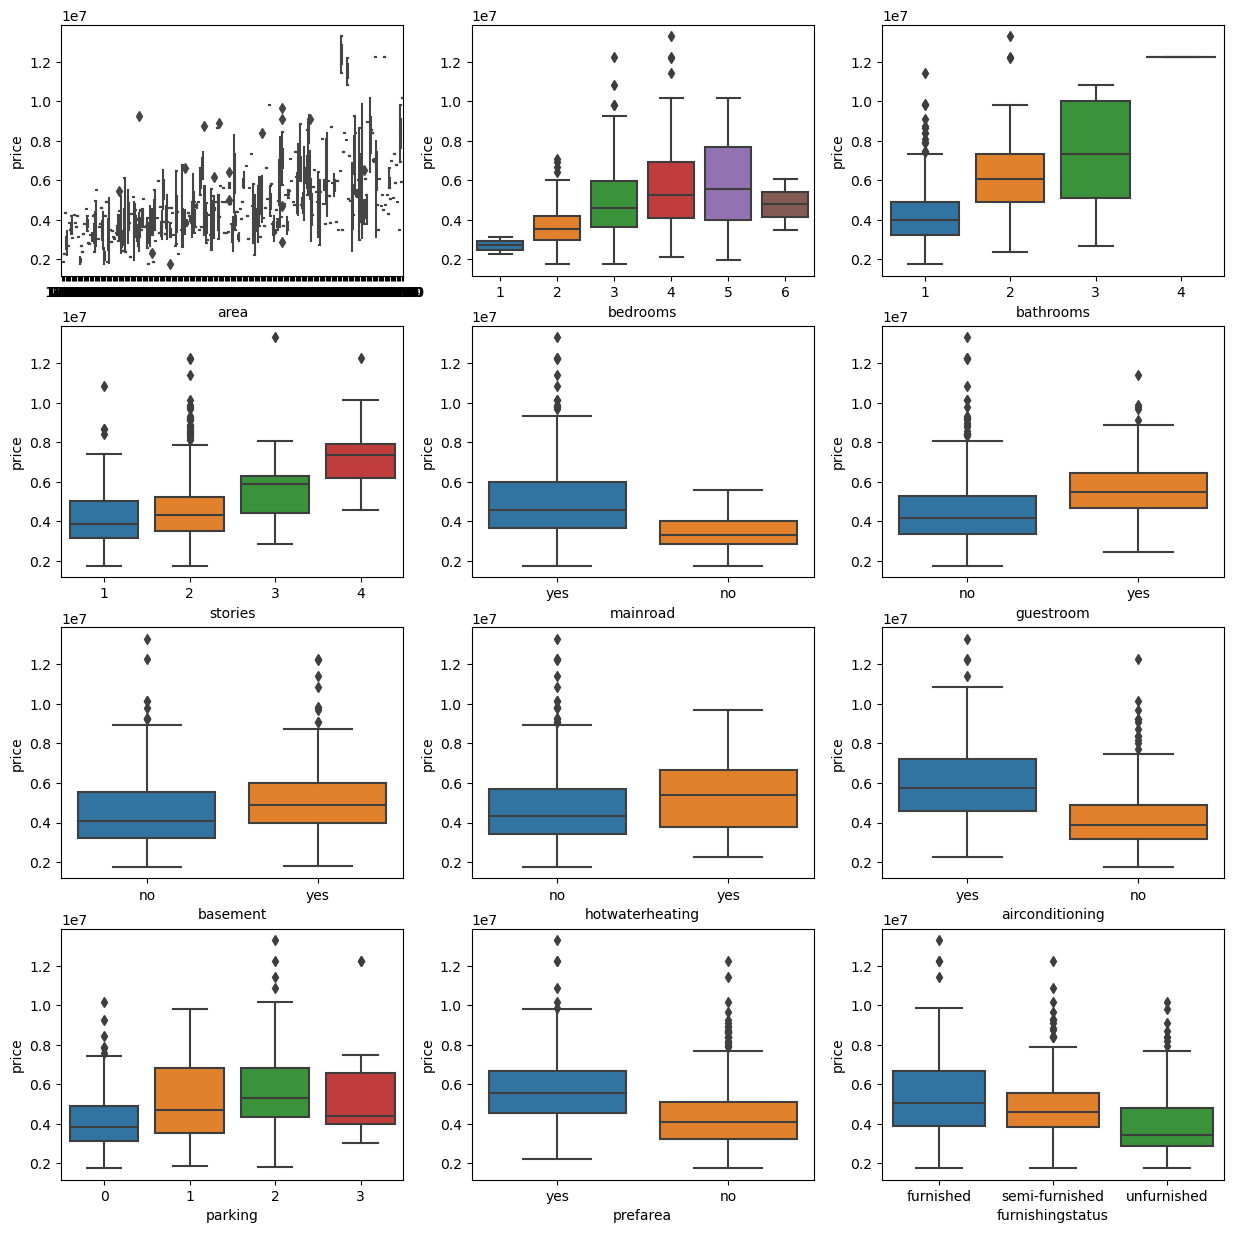

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 3, figsize=(15, 15))
features = df.columns.drop('price')
feat_count = 0

for i in range(4):
    for j in range(3):
        sns.boxplot(ax=ax[i, j], data=df, x=features[feat_count], y='price')
        feat_count += 1

# EXPLORATORY DATA ANALYSIS

### 1. How to Construct a Bar Graph with Overlay Using Python

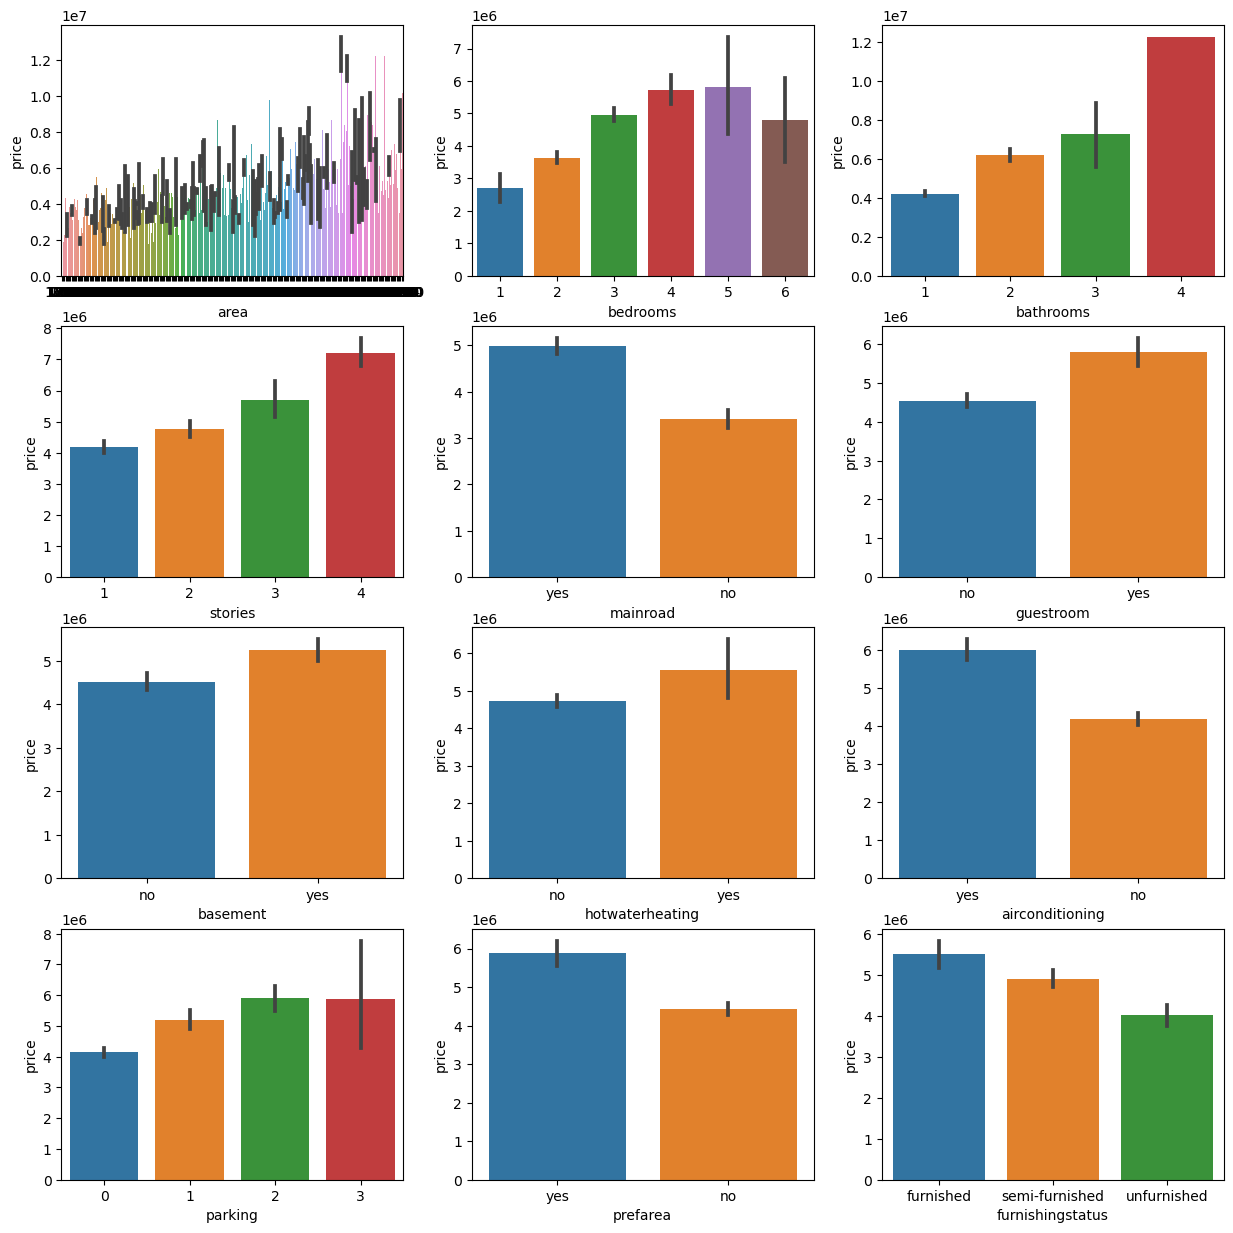

In [18]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
feat_count = 0

for i in range(4):
    for j in range(3):
        sns.barplot(ax=ax[i, j], data=df, x=features[feat_count], y='price')
        feat_count += 1

### 2. How to Construct Contingency Tables Using Python

<Axes: >

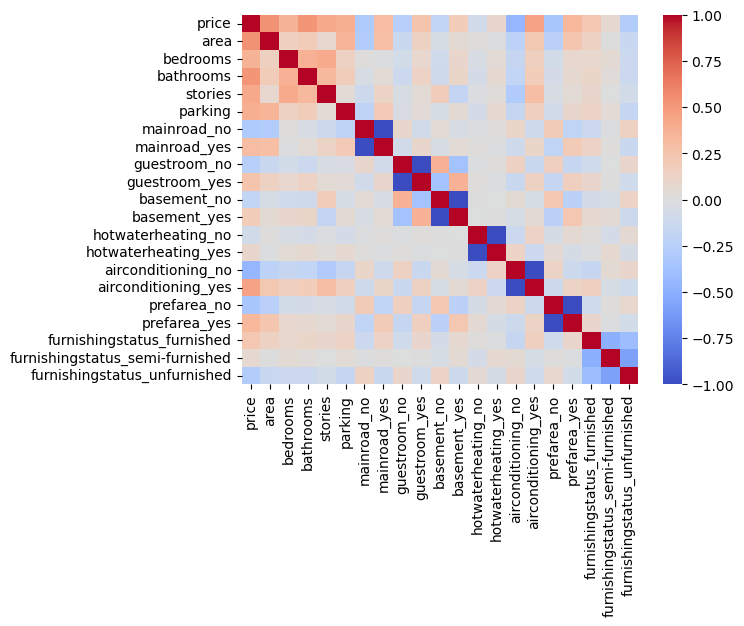

In [19]:
sns.heatmap(df_reexpress.corr(), cmap='coolwarm')

### 3. How to construct histograms with overlays in python

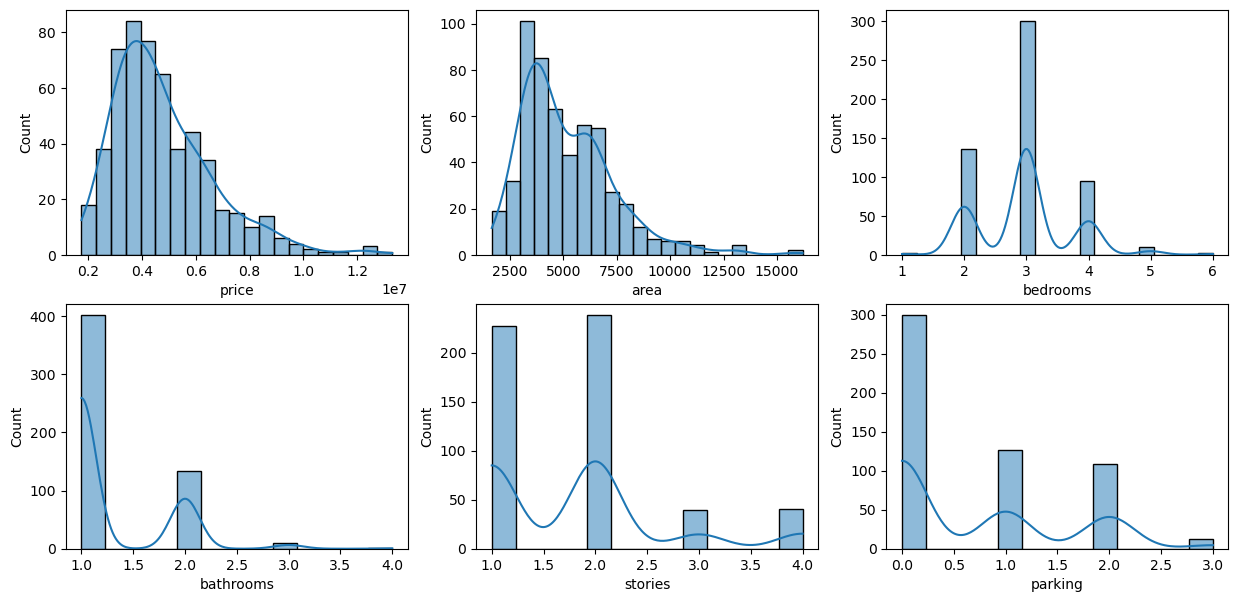

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
feat_count = 0

for i in range(2):
    for j in range(3):
        sns.histplot(ax=ax[i, j], data=df, x=features[feat_count], kde=True)
        feat_count += 1

### 4. How to Perform Binning Based on Predictive Value Using Python

In [21]:
bins = [140000, 392000, 644000.0, 896000.0, 1148000.0, 1400000.0]
group_names = ['Low', 'Average', 'Good', 'Pricy' ,'Expensive']

In [22]:
df['Price_binned'] = pd.cut(df['price'], bins, labels=group_names)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,NaN
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,NaN
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,NaN
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,NaN
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,NaN


# DATA PREPERATION PHASE TO MODEL THE DATA

### 1. How to partition the data in python

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price', 'Price_binned'])
Y = df['price']
print(X.shape, Y.shape)

(545, 12) (545,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(408, 12) (408,)
(137, 12) (137,)


### 2. How to Balance the Training Data Set Python

since the data is already balanced, we dont need to use the balancer

In [25]:
# from imblearn.over_sampling import SMOTE

# smt = SMOTE()
# x_train, y_train = smt.fit_resample(x_train, y_train)

### 3. How to Build CART Decision Trees Using R/Python
For this i will be using the IRIS data set

In [26]:
data_iris = pd.read_csv("../Data Science/Kaggle_Data/IRIS.csv")

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data_iris[features]
Y = data_iris['species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

[Text(0.4, 0.9166666666666666, 'petal_length <= 2.45\ngini = 0.667\nsamples = 112\nvalue = [37, 38, 37]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.75, 'petal_length <= 4.95\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(0.2, 0.5833333333333334, 'petal_width <= 1.65\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'sepal_width <= 3.1\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'petal_width <= 1.7\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.4166666666666667, 'petal_width <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.25, 'sepal_width <= 2.85\ngini = 0.5\nsamples = 2

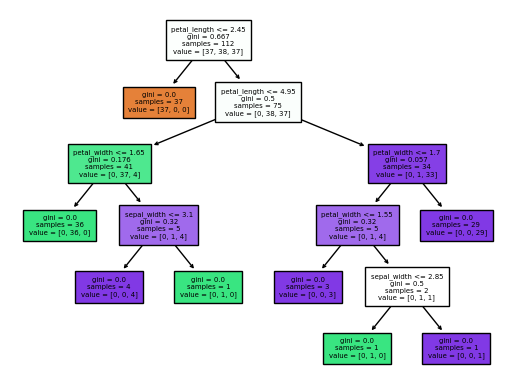

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DTree = DecisionTreeClassifier()
DTree.fit(x_train, y_train)

plot_tree(DTree, feature_names=features, fontsize=5, filled=True)

### 4. How to Build C5.0 Decision Trees Using R/Python

[Text(0.4, 0.9166666666666666, 'petal_width <= 0.8\nentropy = 1.585\nsamples = 112\nvalue = [37, 38, 37]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.75, 'petal_length <= 4.95\nentropy = 1.0\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(0.2, 0.5833333333333334, 'petal_width <= 1.65\nentropy = 0.461\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'sepal_width <= 3.1\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'sepal_length <= 6.05\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.4166666666666667, 'petal_width <= 1.7\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.6, 0.25, 'petal_width <= 1.55\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0

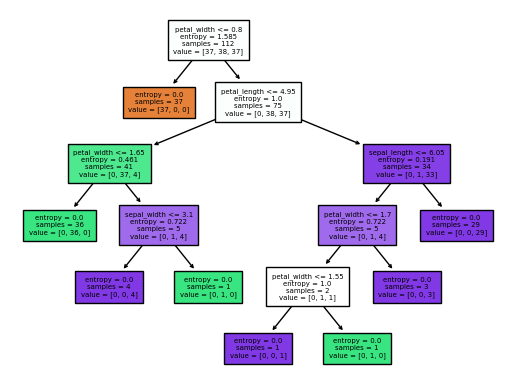

In [28]:
C5Tree = DecisionTreeClassifier(criterion='entropy')
C5Tree.fit(x_train, y_train)

plot_tree(C5Tree, feature_names=features, fontsize=5, filled=True)

### 5. How to Build Random Forests using Python

In [29]:
from sklearn.ensemble import RandomForestClassifier

rgc = RandomForestClassifier()
rgc.fit(x_train, y_train)

RandomForestClassifier()

# MODEL EVALUATION

### 1. How to perform model evaluation in python

Taking the CART Decision Tree model


Accuracy Score: 0.9736842105263158


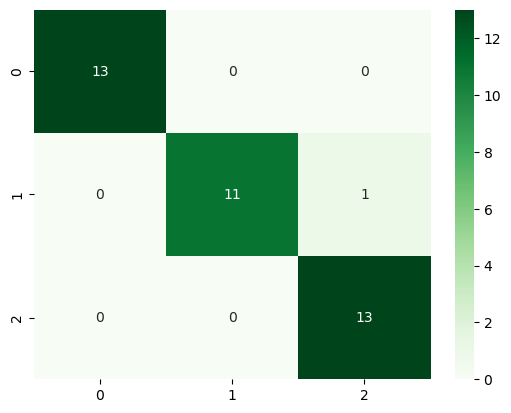

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_predicted = DTree.predict(x_test)

cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, cmap='Greens')

print('\nAccuracy Score:', accuracy_score(y_test, y_predicted))

# NAÏVE BAYES CLASSIFICATION

### 1. Demonstrate application of Naïve Bayes Using R/Python

In [31]:
spam_df = pd.read_csv('../Data science/Udemy_data/emails.csv')

ham = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

In [32]:
print(f'Spam percentage: {(len(spam)/len(spam_df)) * 100} %')
print(f'ham percentage: {(len(ham)/len(spam_df)) * 100} %')

Spam percentage: 23.88268156424581 %
ham percentage: 76.11731843575419 %


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spam_ham_cntvect = vectorizer.fit_transform(spam_df['text'])

print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [34]:
print(spam_ham_cntvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
labels = spam_df['spam'].values
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split

x = spam_ham_cntvect
y = labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)

In [37]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

<Axes: >

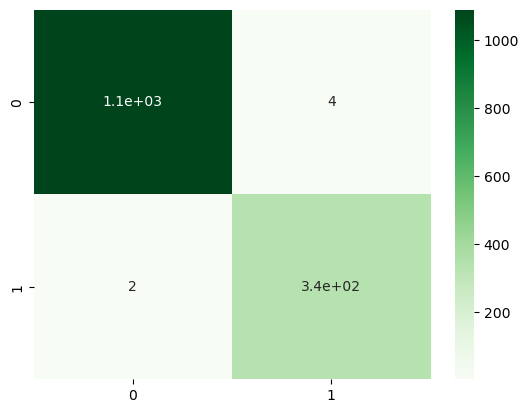

In [38]:
from sklearn.metrics import classification_report

y_predict = NB_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Greens')

In [39]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1094
           1       0.99      0.99      0.99       338

    accuracy                           1.00      1432
   macro avg       0.99      1.00      0.99      1432
weighted avg       1.00      1.00      1.00      1432



# NEURAL NETWORKS

In [40]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [41]:
df = pd.read_csv('../Data Science/Udemy_Data/Car_Purchasing_Data.csv', encoding='ISO-8859-1')

X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
Y = df['Car Purchase Amount']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

Y = Y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(Y)

x_train0, x_test, y_train0, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25, random_state=40)
x_train, x_cv, y_train, y_cv = train_test_split(x_train0, y_train0, test_size=0.25, random_state=40)

In [42]:
def build_model(hp):
    model = Sequential()
    counter = 0
    
    for i in range(hp.Int('layers', min_value=1, max_value=10)):
        if counter == 0:
            model.add(
                Dense(
                    hp.Int('units '+str(i), min_value=8, max_value=512, step=8),
                    activation=hp.Choice('activation '+str(i), values=['relu', 'tanh', 'sigmoid']),
                    input_dim=5
                )
            )
            model.add(Dropout(hp.Choice('dropout '+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            model.add(
                Dense(
                    hp.Int('units '+str(i), min_value=8, max_value=512, step=8),
                    activation=hp.Choice('activation '+str(i), values=['relu', 'tanh', 'sigmoid'])
                )
            )
            model.add(Dropout(hp.Choice('dropout '+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        
        counter += 1
    
    model.add(Dense(1, activation='linear'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'sgd', 'adam', 'nadam', 'adadelta']),
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )
    
    return model

In [43]:
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=5,
                        directory='Models',
                        project_name='Project1_CarPurchasingPredictorNN'
                       )

Reloading Tuner from Models\Project1_CarPurchasingPredictorNN\tuner0.json


In [44]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_cv, y_cv))

In [45]:
model_hp = tuner.get_best_models(num_models=1)[0]
model_hist = model_hp.fit(x_train, y_train, epochs=50, validation_data=(x_cv, y_cv), verbose=1, batch_size=50)

Epoch 1/50
6/6 [==============================] - 1s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.1631 - val_loss: 0.0211 - val_mean_absolute_error: 0.1122
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.1574 - val_loss: 0.0207 - val_mean_absolute_error: 0.1106
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.1583 - val_loss: 0.0188 - val_mean_absolute_error: 0.1038
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.1381 - val_loss: 0.0199 - val_mean_absolute_error: 0.1074
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.1377 - val_loss: 0.0177 - val_mean_absolute_error: 0.1004
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.1356 - val_loss: 0.0178 - val_mean_absolute_error: 0.1006
Epoch 7/50
6/6 [=======================

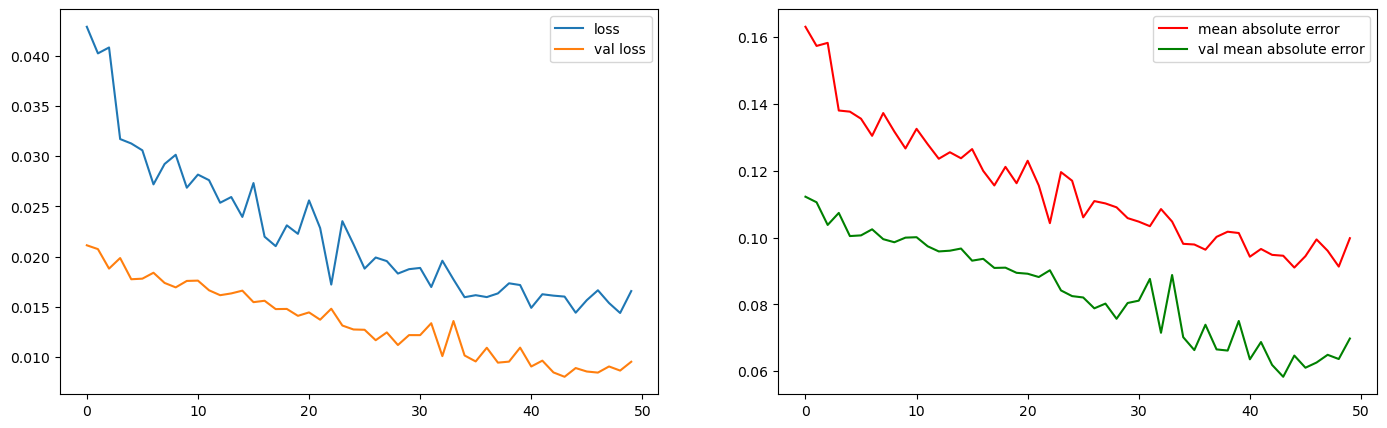

In [46]:
plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
plt.plot(model_hist.history['loss'], label='loss')
plt.plot(model_hist.history['val_loss'], label='val loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_hist.history['mean_absolute_error'], label='mean absolute error', color='r')
plt.plot(model_hist.history['val_mean_absolute_error'], label='val mean absolute error', color='g')
plt.legend()

# CLUSTERING

### 1. Demonstrate  application of k‐MEANS CLUSTERING Using Python

In [47]:
from sklearn.neighbors import KNeighborsClassifier

data_iris = pd.read_csv("../Data Science/Kaggle_Data/IRIS.csv")

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data_iris[features]
Y = data_iris['species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

<Axes: >

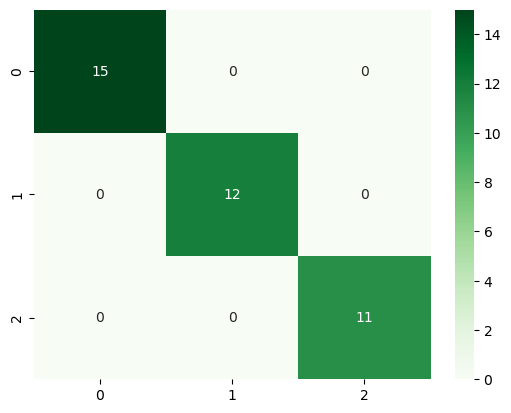

In [48]:
y_predicted = knc.predict(x_test)

cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, cmap='Greens')

In [49]:
print('Accuracy:',accuracy_score(y_test, y_predicted))

Accuracy: 1.0


# REGRESSION MODELLING

### 1. Demonstrate Stepwise Regression Using Python

In [50]:
from sklearn.linear_model import SGDRegressor

df = pd.read_csv('../Data Science/Udemy_Data/Car_Purchasing_Data.csv', encoding='ISO-8859-1')

X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
Y = df['Car Purchase Amount']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

Y = Y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(Y)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25, random_state=40)

In [51]:
regg = SGDRegressor(max_iter=1000)
regg.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predicted = regg.predict(x_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_predicted)} \nMean Squared Error: {mean_squared_error(y_test, y_predicted)}')

Mean Absolute Error: 0.0938893575643499 
Mean Squared Error: 0.013036410950634472


# LOGISTIC REGRESSION MODELLING

### 1.How to Perform Logistic Regression Using R/Python

In [53]:
from sklearn.linear_model import LogisticRegression

data_gender = pd.read_csv("../Data Science/Kaggle_Data/gender_classification_v7.csv")

data_gender['gender'] = data_gender['gender'].map({'Male' : 0, 'Female' : 1})

data_gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [54]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [55]:
X = data_gender.drop('gender', axis=1)
Y = data_gender['gender']

In [56]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

Y = Y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(Y)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25, shuffle=True)
log_regg = LogisticRegression()
log_regg.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [58]:
y_predicted = log_regg.predict(x_test)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_predicted)} \nMean Squared Error: {mean_squared_error(y_test, y_predicted)}')

Mean Absolute Error: 0.026378896882494004 
Mean Squared Error: 0.026378896882494004


### 2. How to Perform Poisson Regression Using Python

In [59]:
from sklearn.linear_model import PoissonRegressor

poss_reg = PoissonRegressor()
poss_reg.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [60]:
y_predicted = poss_reg.predict(x_test)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_predicted)} \nMean Squared Error: {mean_squared_error(y_test, y_predicted)}')

Mean Absolute Error: 0.3923355392132215 
Mean Squared Error: 0.15609727251009123


# ASSOCIATION RULES

In [61]:
from mlxtend.frequent_patterns import apriori, association_rules

df_stuff = pd.read_csv('../Data Science/Kaggle_Data/Groceries_dataset.csv')
df_stuff.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [62]:
df_stuff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [63]:
df_stuff.rename(columns={"Member_number": "Member_Number","itemDescription":"Item"}, inplace=True)

In [64]:
df_stuff.head()

,Member_Number,Date,Item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [65]:
print("Rows before remove duplicates " + str(len(df_stuff)))
print("Rows after remove duplicates " + str(len(df_stuff.drop_duplicates())))
df_stuff = df_stuff.drop_duplicates()

Rows before remove duplicates 38765
Rows after remove duplicates 38006


In [66]:
df_stuff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_Number  38006 non-null  int64 
 1   Date           38006 non-null  object
 2   Item           38006 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [67]:
basket = (df_stuff.groupby(['Member_Number','Item'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_Number'))

basket.head()

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_Number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [68]:
def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)
basket.head(10)

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_Number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
#Run apriori algorithm
df_trans = pd.DataFrame(basket)

frequent_itemsets = apriori(df_trans, min_support=0.1, use_colnames=True).sort_values(by="support", ascending=False)
frequent_itemsets

D:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
27,0.458184,(whole milk)
16,0.376603,(other vegetables)
20,0.349666,(rolls/buns)
24,0.313494,(soda)
28,0.282966,(yogurt)
25,0.233710,(tropical fruit)
21,0.230631,(root vegetables)
2,0.213699,(bottled water)
22,0.206003,(sausage)
32,0.191380,"(other vegetables, whole milk)"


In [70]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[(rules['confidence'] > 0.5)]

rules.sort_values(['confidence'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
1,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
2,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
3,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
4,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802


In [71]:
def frequently_bought_together(item):
    
    # df of item passed
    item_df = basket.loc[basket[item]==1]
    
    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.1, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))

    rules = rules[(rules['antecedent_len'] == 1) & (rules['consequents_len'] == 1) & (rules['lift'] > 1)]
    
    # Sorting on lift and support
    rules.sort_values(['confidence'],ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    bt = rules['consequents'].drop_duplicates()
    
    # Returning top 6 items with highest lift and support
    return bt

In [72]:
frequently_bought_together('yogurt')

Items frequently bought together with yogurt


D:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


4        (bottled water)
5     (other vegetables)
6           (whole milk)
15         (canned beer)
22        (citrus fruit)
48          (rolls/buns)
51     (root vegetables)
52             (sausage)
54                (soda)
57      (tropical fruit)
63              (pastry)
67           (pip fruit)
95       (shopping bags)
Name: consequents, dtype: object